In [ ]:
import pandas as pd
from prophet import Prophet

In [ ]:
# 데이터셋 불러오기 (여기서는 예제로 사용될 데이터프레임 생성)
data = pd.read_csv('.csv/train.csv')
df = pd.DataFrame(data)
df

,ID,제품,대분류,중분류,소분류,브랜드,2022-01-01,2022-01-02,2022-01-03,2022-01-04,...,2023-03-26,2023-03-27,2023-03-28,2023-03-29,2023-03-30,2023-03-31,2023-04-01,2023-04-02,2023-04-03,2023-04-04
0,0,B002-00001-00001,B002-C001-0002,B002-C002-0007,B002-C003-0038,B002-00001,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,B002-00002-00001,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,0,0,0,0,...,0,0,0,1,3,2,0,0,2,0
2,2,B002-00002-00002,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,B002-00002-00003,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,B002-00003-00001,B002-C001-0001,B002-C002-0001,B002-C003-0003,B002-00003,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15885,15885,B002-03799-00002,B002-C001-0003,B002-C002-0008,B002-C003-0042,B002-03799,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15886,15886,B002-03799-00003,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03799,0,0,0,0,...,0,0,0,3,0,2,4,1,1,3
15887,15887,B002-03799-00004,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03799,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15888,15888,B002-03799-00005,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03799,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [ ]:
# 예측할 제품 불러오기
df_prd = data[data['제품'] == 'B002-00060-00005']
print(df_prd)

      ID                제품             대분류             중분류             소분류  \
117  117  B002-00060-00005  B002-C001-0002  B002-C002-0003  B002-C003-0018   

            브랜드  2022-01-01  2022-01-02  2022-01-03  2022-01-04  ...  \
117  B002-00060          19          18          19          26  ...   

     2023-03-26  2023-03-27  2023-03-28  2023-03-29  2023-03-30  2023-03-31  \
117           0           0           0           8           2           5   

     2023-04-01  2023-04-02  2023-04-03  2023-04-04  
117          10          11           8          27  

[1 rows x 465 columns]


In [ ]:
# 데이터셋을 long format으로 변환
df_long = df_prd.melt(id_vars=['ID', '제품', '대분류', '중분류', '소분류', '브랜드'], var_name='ds', value_name='y')
df_long

,ID,제품,대분류,중분류,소분류,브랜드,ds,y
0,117,B002-00060-00005,B002-C001-0002,B002-C002-0003,B002-C003-0018,B002-00060,2022-01-01,19
1,117,B002-00060-00005,B002-C001-0002,B002-C002-0003,B002-C003-0018,B002-00060,2022-01-02,18
2,117,B002-00060-00005,B002-C001-0002,B002-C002-0003,B002-C003-0018,B002-00060,2022-01-03,19
3,117,B002-00060-00005,B002-C001-0002,B002-C002-0003,B002-C003-0018,B002-00060,2022-01-04,26
4,117,B002-00060-00005,B002-C001-0002,B002-C002-0003,B002-C003-0018,B002-00060,2022-01-05,29
...,...,...,...,...,...,...,...,...
454,117,B002-00060-00005,B002-C001-0002,B002-C002-0003,B002-C003-0018,B002-00060,2023-03-31,5
455,117,B002-00060-00005,B002-C001-0002,B002-C002-0003,B002-C003-0018,B002-00060,2023-04-01,10
456,117,B002-00060-00005,B002-C001-0002,B002-C002-0003,B002-C003-0018,B002-00060,2023-04-02,11
457,117,B002-00060-00005,B002-C001-0002,B002-C002-0003,B002-C003-0018,B002-00060,2023-04-03,8


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9_78feqp/942uz0v0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9_78feqp/rbun11p8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48066', 'data', 'file=/tmp/tmp9_78feqp/942uz0v0.json', 'init=/tmp/tmp9_78feqp/rbun11p8.json', 'output', 'file=/tmp/tmp9_78feqp/prophet_model1u8sv40c/prophet_model-20240715101652.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:16:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:16:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


            ds      yhat  yhat_lower  yhat_upper
484 2023-04-30  6.787749   -5.891932   19.382235
485 2023-05-01  5.451390   -6.371109   18.863434
486 2023-05-02  6.426143   -5.164664   18.697563
487 2023-05-03  8.720008   -3.429726   20.528366
488 2023-05-04  9.663930   -2.075070   21.611616


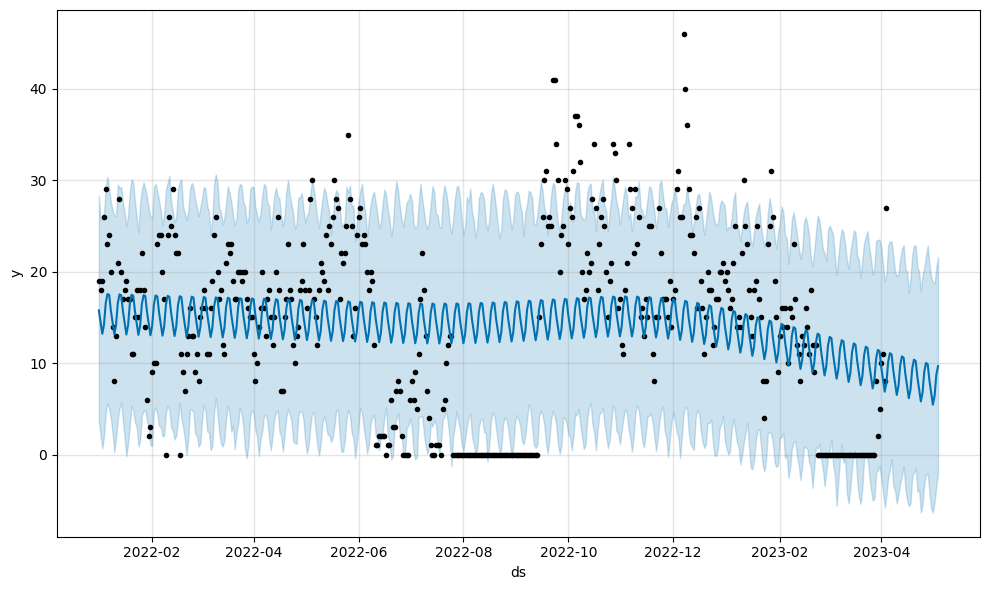

In [ ]:
# 날짜 형식 변환
df_long['ds'] = pd.to_datetime(df_long['ds'])

# Prophet 모델 생성 및 훈련
model = Prophet()
model.fit(df_long)

# 미래 데이터프레임 생성 (30일 후까지 예측)
future = model.make_future_dataframe(periods=30)

# 예측
forecast = model.predict(future)

# 결과 출력
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

# 예측 결과 시각화
fig = model.plot(forecast)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9_78feqp/1jmre3vq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9_78feqp/7j3cupjm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57718', 'data', 'file=/tmp/tmp9_78feqp/1jmre3vq.json', 'init=/tmp/tmp9_78feqp/7j3cupjm.json', 'output', 'file=/tmp/tmp9_78feqp/prophet_modelym2qmdhg/prophet_model-20240715102641.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:26:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:26:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


            ds      yhat  yhat_lower  yhat_upper
514 2023-05-30  5.003037   -6.908792   17.547839
515 2023-05-31  7.296903   -5.934459   19.407537
516 2023-06-01  8.240824   -4.444583   19.864685
517 2023-06-02  8.095551   -4.499637   20.273885
518 2023-06-03  6.315286   -6.525871   18.610825


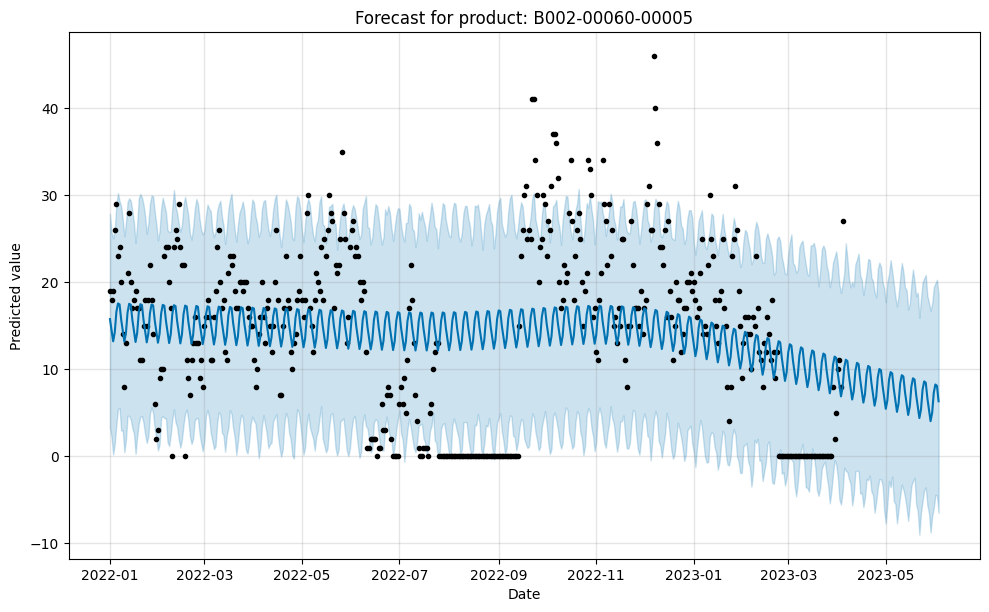

In [ ]:
import matplotlib.pyplot as plt

def predict_and_plot(product_code, forecast_period=30, data_path='train.csv'):
    # 데이터셋 불러오기
    data = pd.read_csv(data_path)

    # 특정 제품 필터링
    df_prd = data[data['제품'] == product_code]

    if df_prd.empty:
        print(f"No data found for product: {product_code}")
        return

    # 데이터셋을 long format으로 변환
    df_long = df_prd.melt(id_vars=['ID', '제품', '대분류', '중분류', '소분류', '브랜드'],
                          var_name='ds', value_name='y')

    # 날짜 형식 변환
    df_long['ds'] = pd.to_datetime(df_long['ds'])

    # Prophet 모델 생성 및 훈련
    model = Prophet()
    model.fit(df_long)

    # 미래 데이터프레임 생성 (예측 기간 설정)
    future = model.make_future_dataframe(periods=forecast_period)

    # 예측
    forecast = model.predict(future)

    # 예측 결과 출력
    print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

    # 예측 결과 시각화
    fig = model.plot(forecast)
    plt.title(f"Forecast for product: {product_code}")
    plt.xlabel("Date")
    plt.ylabel("Predicted value")
    plt.show()

    return forecast

# 예시 사용법
product_code = 'B002-00060-00005'
forecast_period = 60  # 사용자 지정 예측 기간
forecast = predict_and_plot(product_code, forecast_period)
